In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [ ]:
class AgentState(TypedDict):
    values: List[int]
    name: str
    result: str


In [9]:
def process_values(state: AgentState) -> AgentState:
    print(state)
    state['result'] = f"Hi there {state['name']}!, tour sum = {sum(state['values'])}"
    print(state)
    return state


In [10]:
graph = StateGraph(AgentState)

graph.add_node('processor', process_values)
graph.set_entry_point('processor')
graph.set_finish_point('processor')

app = graph.compile() #compile the graph


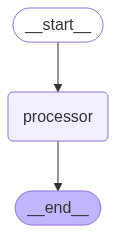

In [11]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [12]:
answers = app.invoke({"values":[1,2,3,4], "name":'Govinda'})

{'values': [1, 2, 3, 4], 'name': 'Govinda'}
{'values': [1, 2, 3, 4], 'name': 'Govinda', 'result': 'Hi there Govinda!, tour sum = 10'}


In [13]:
print(answers['result'])  # Output: Hi there Govinda!, tour sum = 10

Hi there Govinda!, tour sum = 10


### Assignment for Graph 2

In [14]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [26]:
class GivenAgentState(TypedDict):
    name: str
    values: List[int]
    operations: str
    result: str


In [17]:
!pip install numpy

  Using cached numpy-2.2.6-cp310-cp310-macosx_14_0_arm64.whl (5.3 MB)

[notice] A new release of pip available: 22.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [27]:
import numpy as np
def do_desired(state:GivenAgentState) -> GivenAgentState:
    print(state)
    if state['operations'] == '+':
        state['result'] = f"Hi {state['name']}, your answer is {sum(state['values'])}"
    elif state['operations'] == '*':
        state['result'] = f"Hi {state['name']}, your answer is {np.prod(state['values'])}"
    return state


In [28]:
graph = StateGraph(GivenAgentState)

graph.add_node('desired', do_desired)

graph.set_entry_point('desired')
graph.set_finish_point('desired')

app = graph.compile()  # compile the graph

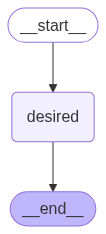

In [29]:
# Display the graph for the new app
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [30]:
results = app.invoke({'name':'Krishna','values':[10,20,30], 'operations':'+'})

{'name': 'Krishna', 'values': [10, 20, 30], 'operations': '+'}


In [31]:
print(results['result'])  # Output: Hi Krishna, your answer is 60

Hi Krishna, your answer is 60
